# Examine spectrum of C/1996 B1 (Hyakutake)

For this exercise, we will examine a spectrum of comet C/1996 B1 (Hyakutake) taken from Kitt Peak.  The data are archived at the PDS Small Bodies Node: "Spectra of C/1996 B2 (Hyakutake) for Multiple Offsets from Photocenter" by A'Hearn et al. (2015), urn:nasa:pds:gbo-kpno:hyakutake_spectra::1.0.  The data are available at: https://pdssbn.astro.umd.edu/holdings/pds4-gbo-kpno:hyakutake_spectra-v1.0/SUPPORT/dataset.html.

The data set consists of a series of spectra with high-spectral resolving power between 3040 to 4500 Å at multiple offsets from the nucleus.  The data are text-based tables with PDS4 labels.

The following code is written for Python 3.

## The short-short version: Download, read, inspect, and plot the spectrum

Processing label: offset_0_arcsec.xml
Now processing a Table_Character structure: Spectrum

Fields for Table_Character 'Spectrum' (2 fields x 22434 records): 

Wavelength
Flux Density


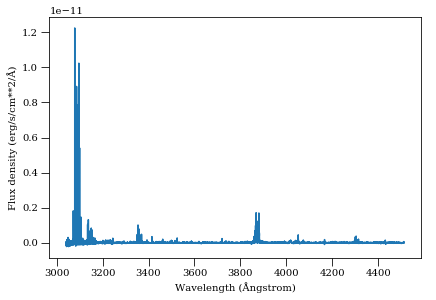

In [5]:
from urllib.request import urlretrieve # to download the data
from pds4_tools import pds4_read       # to read and inspect the data and metadata
import textwrap                        # for reformatting label text
import matplotlib.pyplot as plt        # for plotting

# for plotting in Jupyter notebooks
%matplotlib inline

# Download data from PDS SBN
label_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-gbo-kpno:hyakutake_spectra-v1.0/data/offset_0_arcsec.xml', filename='offset_0_arcsec.xml')
table_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-gbo-kpno:hyakutake_spectra-v1.0/data/offset_0_arcsec.tab', filename='offset_0_arcsec.tab')

# Read in the label (meta-data) and data.  If the data file is saved with the correct file name,
# then reading in the label with pds4_read will also read in the data.
data = pds4_read(label_fn)

# The data is a table named "Spectrum".  Print out a summary of the data, including field (i.e.,
# column) names.
print()
data['Spectrum'].info()

# Plot the spectrum, including automatic labeling of the axis units.
fig, ax = plt.subplots()
ax.plot(data['Spectrum']['Wavelength'], data['Spectrum']['Flux Density'])
labels = plt.setp(ax, xlabel='Wavelength ({})'.format(data['Spectrum']['Wavelength'].meta_data['unit']),
                  ylabel='Flux density ({})'.format(data['Spectrum']['Flux Density'].meta_data['unit']))
plt.show()
plt.savefig('spectrum-example-hyakutake.png')

## Detailed example with PDS4 label inspection

### Download offset = 0 data from SBN

In [2]:
from urllib.request import urlretrieve
label_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-gbo-kpno:hyakutake_spectra-v1.0/data/offset_0_arcsec.xml', filename='offset_0_arcsec.xml')
table_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-gbo-kpno:hyakutake_spectra-v1.0/data/offset_0_arcsec.tab', filename='offset_0_arcsec.tab')
print('Downloaded label and table:', label_fn, table_fn)

Downloaded label and table: offset_0_arcsec.xml offset_0_arcsec.tab


### Use PDS4 Python tools to read in the label and data

In [3]:
from pds4_tools import pds4_read
data = pds4_read(label_fn)

Processing label: offset_0_arcsec.xml
Now processing a Table_Character structure: Spectrum


### Inspect the label: The `<Observation_Area>` class
The <Observation_Area> class describes the overall parameters of observational data (target, observing instrument, UTC, etc.). It is required in observational products.

First, we print the immediate children of the `<Observation_Area>` tag, the contents of the `<comment>` tag, and the start and stop times of the data set.

In [4]:
for e in data.label.findall('Observation_Area/*'):
    print(e.tag)

comment
Time_Coordinates
Primary_Result_Summary
Investigation_Area
Observing_System
Target_Identification


In [11]:
# note, this text description is presented exactly as it is formatted in the label
print(data.label.find('Observation_Area/comment').text)


			These data were obtained on the date of closest approach of the
			comet to Earth, so there is no significant Doppler shift in the
			cometary OH lines used for calibration.
			
			These spectrum presented is a weighted (by exposure time)
			average of three observations taken on the photocenter of
			the comet with the slit oriented East-West. Two 600-second
			observations and one 1800-second observation contributed to 
			this result.
			
			The wavelength scale was set using a thorium-argon lamp 
			spectrum, with further adjustment based on the fluorescent
			lines of OH in the 3140-3250 angstrom range.
		


In [6]:
print(data.label.find('Observation_Area/Time_Coordinates/start_date_time').text)
print(data.label.find('Observation_Area/Time_Coordinates/stop_date_time').text)

1996-03-26T05:57:57Z
1996-03-26T11:19:23Z


The `<Observing_System>` class documents the significant pieces of the observing equipment.  It is used, for example, to associate instruments, spacecraft, or telescopes with the product.  A user unfamiliar with the source of the data would discover these components via: 

In [7]:
for e in data.label.findall('Observation_Area/Observing_System/Observing_System_Component/name'):
    print(e.text)

Kitt Peak National Observatory
Mayall 4m Telescope
Echelle Spectrograph


## Inspect the data structure

The file format can be discovered via the archive documentation or the label.  In this case, it is a fixed-width text-based table.  However, this knowledge is not critical beforehand if one using the PDS4 tools.  Product metadata is read in by the module, and can be inspected to help the user understand the data structure:

In [8]:
data.info()

0   Table_Character  'Spectrum'  2 fields x 22434 records


In [9]:
# The data is a table named "Spectrum".  Print out a summary of the data, including field (i.e.,
# column) names.
import textwrap

data['Spectrum'].info()
print()
print('Field descriptions:')
for k in ['Wavelength', 'Flux Density']:
    desc = data['Spectrum'][k].meta_data['description']
    # remove leading and trailing whitespace, tabs and newlines
    desc = desc.strip()
    desc = desc.replace('\n', ' ').replace('\t', '')
    # re-wrap the description with an indent and "bullet"
    print(textwrap.fill(desc, initial_indent='* ', subsequent_indent='  '))

Fields for Table_Character 'Spectrum' (2 fields x 22434 records): 

Wavelength
Flux Density

Field descriptions:
* Wavelength in Ångstroms
* The flux density at the corresponding wavelength, measured over an
  aperture ±3.7 arcseconds orthogonal to the offset direction, and
  ±0.43 arcseconds in the offset (sunward) direction.


### Plot the spectrum with `matplotlib`

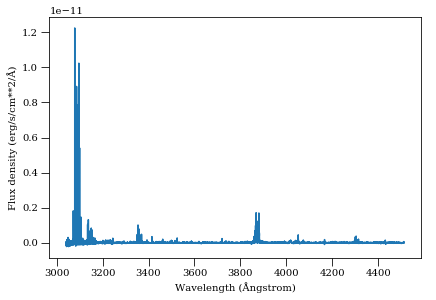

In [10]:
import matplotlib.pyplot as plt

# to display plots inline in Jupyter notebook:
%matplotlib inline

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the spectrum
ax.plot(data['Spectrum']['Wavelength'], data['Spectrum']['Flux Density'])

# Note the automatic labeling of the axis units via metadata
labels = plt.setp(ax, xlabel='Wavelength ({})'.format(data['Spectrum']['Wavelength'].meta_data['unit']),
                  ylabel='Flux density ({})'.format(data['Spectrum']['Flux Density'].meta_data['unit']))

plt.show()